In [1]:
from policy_bench.methods.diffusion_policy import DiffusionPolicy
from argon.policy import PolicyInput

import argon.numpy as npx
import argon.store
import argon.tree
import argon.random

import comet_ml
experiment = comet_ml.start()

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/pfrommerd/general/8f4c306f25d34b3fa12620597c00a6ab



In [2]:
artifact = experiment.get_artifact("pusht-chi-diffusion_policy:14.0.0")
checkpoint : DiffusionPolicy = argon.store.comet.from_artifact(artifact)
dataset = checkpoint.data.create_dataset()
env, train = checkpoint.data.load(dataset, {"train"})
policy = checkpoint.create_policy()

In [3]:
x0 = env.reset(argon.random.key(42))

In [4]:
trajs = []
action_chunks = []

x = x0
policy_state = None
rng = argon.random.sequence(42)
for t in range(100):
    obs = env.observe(x)
    out = policy(PolicyInput(obs, x0, policy_state, next(rng)))
    policy_state = out.policy_state
    trajs.append(x)
    action_chunks.append(out.info)
    x = env.step(x, out.action, next(rng))
traj = argon.tree.map(
    lambda *x: npx.stack(x), *trajs
)
action_chunks = argon.tree.map(
    lambda *x: npx.stack(x), *action_chunks
)

In [5]:
env.visualize(traj, action_chunks=action_chunks, type="html")

'\n        <iframe srcdoc="<!DOCTYPE html>\n<html>\n  <head>\n    <title>Visualizer</title>\n  </head>\n  <style>\n    body {\n      margin: 0;\n      padding: 0;\n    }\n    #viewer {\n      height: 100vh;\n      margin: 0;\n      padding: 0;\n    }\n  </style>\n  <script type=&quot;importmap&quot;>\n    {\n      &quot;imports&quot;: {\n        &quot;three&quot;: &quot;https://unpkg.com/three@0.150.1/build/three.module.js&quot;,\n&quot;three/addons/&quot;: &quot;https://unpkg.com/three@0.150.1/examples/jsm/&quot;,\n&quot;lilgui&quot;: &quot;https://cdn.jsdelivr.net/npm/lil-gui@0.18.0/+esm&quot;,\n&quot;viewer&quot;: &quot;https://cdn.jsdelivr.net/gh/google/brax@v0.12.1/brax/visualizer/js/viewer.js&quot;\n      }\n    }\n  </script>\n  <body>\n    <div id=&quot;viewer&quot;></div>\n    <script src=&quot;https://unpkg.com/pako@2.1.0/dist/pako.min.js&quot;></script>\n    <script type=&quot;application/javascript&quot;>\n      var system = &quot;eJztnVvPJLdxhv+KsdeWwSKreMhl7oMEyKUhGLK9cATLWsESECOG/nuet9mj7Z7dDez0CpoZUNJ++namD2TVQ7J4qKq/v3n33Q9v/uVXf3/zw9d/efv9D2+/4y/pN2nMf1qr3nP0/Otfvfn2q7+85cs3//7dD1+/+/bNj4eP/u3dH99+84YPvvn62z//Tp9+z8e/ffPVn95++4M+//037/7wZ/3y1R908+/S4Xc7/J4Pv5fD7374PQ6/18Pv7c2X/OVPb9/95futQv/97q/f/FHF+PtP5fyPb7769u1P5fz6j3/jwy+Mv3/3bivwF/ab9GtVf/uhx/31naTz2/Sb0EeHH9uXf/r9V/Nb12el6Geuv/6VzZu///p/9NrfZj0wz6damv+Yj2RWLX+JIP/xEn66gC01S7XVkbqPkny/7ItPfPMLlX+WyT6swBcPI+KtiB8p4ccF+Qmxf14J69LZlk44/+d3//X2r/dVSXc1uf2IEbn0NFqynLwcKnZi6iNF/6BAHy2lPux7r1Etunm2D+r5YTkOL92qOXuKUzX/9d3f7ur4AVDzuca7e8sj5z7ae4T+sVp6bVuFWs2jDI+tZFHyVqNcWqopNi7rrDiVcOvRxkcqyXebfJq1WnT3TQMfKeGJzX+oqlkCHsm99dTKlPwvVdOPVspaDz2rl/Bh1veKfnns/z8B8sfIPbXB/7tqp28/LKx5h7zJn36eH3OQej4W1n6mwlqOz1Tccixu/pmK+9lK68fSlp+ptKV9ruLGsbj+MxX3cxW2HgsbP1Nh62dDoR2LW3+m4n42EvqxtO1nKm3/bMUdP2pwefP9D1/98HaaxH+bZd5LqIc5XXvLjMX01bVooNoGmF5zYgivufahYXw+XEYaQ3YKY2TwqIwVGhT4MJdo1odhC3GT1fLTLXRz1hOjYK511NZa8f0dSWOkdT7q3k43DG7IaeRUKQPGxXYDtpXnyniSGZ5yj3q4I3eKH9EpQR619La/goFuuCOnYaWWONzhaVgkip+95c4ouN8RvWLOUI/CFX68YSClXntJVsZeJEqhdzBL2rRR2uF6Rr4cVkzfjhS7YFvKGmYj8+5k43h9VF5KfRMPRcLz+lpzQwwdAVfU4acbSvOUGcO5gYLPG0quVqVTbNGadqke6Pu4cbA1Eh9eapIBILGdL6oRjcEdG6FIDz7v+fiTHvLTaWYdwG/IrBfDTG01xo37GJ49By2iQ9t7cS/wF/ivAT48MF8FzQj4fw9lDamsOtLt5T2UC/wF/muAn5ETNg7a1ozca971j6qooiHARHtYXf4i/9XIL8VHTV1slFRyv+m/YwRB0Aj03PMCf4H/YuBTBy8dZJnGmuVbj5+b8Nb6MzQt7Bf2L4Y9BHkdiC/13sxv+rSs/r5I6NZ9mfgL/JcDv6US5t2c6vZyE/coVrTfCJiZNrDAX+C/HPilRRHAGaB9N3QiM6vthToGqnivnv8X99V9jObAwVy57G2LJ4C88QWQjVHz6YZaKALvGZ17J8QJsVtCvzml4u2ITBVEKSokg/CsAiUyF0ijadO79jjdQBuBKVqjGsbElQkO/8UYVKUmH/14Q2Wa04MqMP7VMrc1mPNTwsrs33O4nV5Ad9Jo7NsltBN9ZYgzaAs0qBrZaz1d3xu9DhLJ3ueev0V4TigFuOkhTqWhmTFAp0pzpkxbaUwTss7H4Nkpji/iP0X8KJj2kJSx7j32HiwNrWzSB48BXnZxTruQX8g/EPJVoyFVQn8YAX2OwcbAXkZFD1mrO35xPruQX8g/EvIRCbPaPWByO9EjXKoXC5N2UHVpC/mF/AshT00LoDC5atjvU1Cp8FlqAzCY08VxLreYX8w/AsfXmLeQKgAWcz5NNUAjZKGDVtFPPyhnIb+QfwSMryHvQGICssHXpgbT9NWRXdes9rgmuIhfxD8CxZeIbxnpM1eVzsZ0MAGVoL9PyNobol3EL+JfifjmNVAbP7Dm+5QetrwNoMlQikAuEi/lMGQwlPQoc0dFR9q0fcMn0Dj8hAusBlSU1CjX3LKBnFxKR+rDaYXH9hEdy2wYU/CqUxPb5SjQOzzzSu0l2/HynGHXePdo2tnaLkfZ/J47LHXPx8J747259M3PwPL2dBqj3Ma0CRVeTk/3QpsulV5E06A6L3canpnwhN047ihRGwSn/afcRp1Sg9aytcYkp4djWba9Kp0ETIP/zWOACLShh1DJ6TvaAv1ToNMdNPes3gxhTSfXnAElgLG2Ao8L9AX6Q8B7zWrHOC/yde3Ryxy4GUwdfBrjb/Gw1aMv0F8AdKzDzbrDci61z+AF6ER2ojnGaxsXz9EszhfnvzznwYwOhTQmP+h5+tJ6VeVDkyrNua6em1mcL85/ec5TztFjACMEzWUCOA55um59fbHF+eL8Idi9wjlIAYK5S15pLsWhmeGj6NBsaI1scb44fwR2L3FuSA4VRqU6sDJlHVpMtt5EPLAt0BfojwDvFdB1rn1stJsxHd01U3VigKpW7Ytc7NC9YP5r1ygManbfDUU+y7lAaBs6fXO83hUSp0SedtOMvgbNWv2Eq55LPrLiXNhAroY3QJ9bXCFPdEAEuOLjtAFEO2GWPWjJfEnD25qY1xypb42jjKjn4uTklB6eFICwzusNGVSgnctU7uf60jLoN4yWl+YOE+hTmKA0wVNyOl9P0VPrtA1kN2ZHAMuURt5l9A5WxnGLiZZYWqGpyqe+MxJvPUfVP4FEa+4p8gL+U8B3E1YVUeexq59ens6WzjRBo6f3ve4CfgH/CBBfMmWQXpVkMxikeeglGBbluarTAaVcdONYvC/eH4n3wCxFRzosAlE7LzLZe+OHZQVbXcQv4l+H+JqYErkcVJHsPL7EVDVrGjUQeh4HbS7gF/CPAPG1Lj6HGeKL1hQqYFMnrQCt1OkQn1YPv4B/IeC3zrw2QHIJcZM2OCjuhBbRUHa5eLZ3Eb+IfyTiSy38wXxBmW0/CYY8dXQbTfSGlpZRs4h/JeJTqooYXHsyOW5s0utdMYZQTB1I8erKZC2m3aCK+oB1xBxHeh7

In [6]:
actions = []
for t in range(50):
    obs = env.observe(trajs[10])
    out = policy(PolicyInput(obs, x0, None, next(rng)))
    actions.append(out.policy_state.last_batched_output.action)

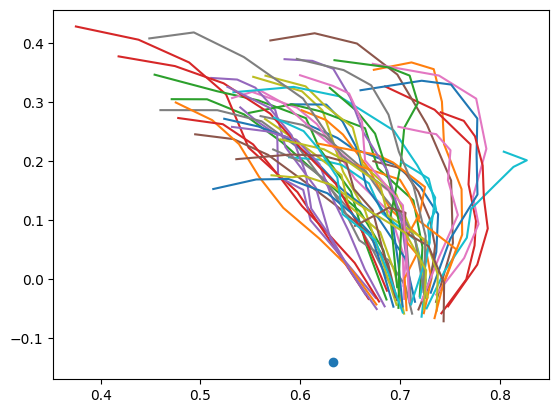

In [7]:
import matplotlib.pyplot as plt

plt.scatter(obs.agent_pos[None,0], obs.agent_pos[None,1])
for a in actions:
    a = a.agent_pos
    plt.plot(a[:,0], a[:,1])